In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import requests

In [42]:
df = pd.read_csv('data_set.csv', sep='\t', names=['text', 'sentiment'], header=None)
df

,text,sentiment
0,ติดอันดับดัชนี DJSI ต่อเนื่อง 3 ปี,pos
1,ดีด 4% หลังคว้างาน “โฮมโปร” 2 โครงการ กว่า 162...,pos
2,"3 หุ้นเรือวิ่งฉิว! รับดัชนี ทะลุ 1,500 จุด-จีน...",pos
3,โบรกอัพเป้าใหม่ 21 บ. คาดปี 66 รายได้ทะลุ 1.1 ...,pos
4,บวก 3% โบรกเคาะเป้า 150 บ. ชี้กำไร Q4 โต 41% ด...,pos
...,...,...
183,บิ๊กล็อต โผล่ปริศนา 20 ล้านหุ้น ต่ำกว่ากระดาน ...,neg
184,สรุปซื้อขายกระดานรายใหญ่วันนี้ มูลค่าสูงสุด 19...,pos
185,ดักเก็บ! ปิดโลว์ 30 บ. โบรกฯชี้ 3 ปีกำไรโตเฉลี...,pos
186,ปั้นแบรนด์ “ทองมาเงินไป” ปักธงพอร์ตลูกหนี้ขายฝ...,pos


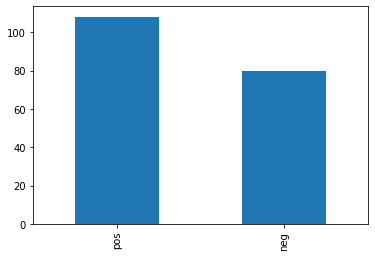

In [43]:
df['sentiment'].value_counts().plot.bar()

In [5]:
pip install --upgrade pythainlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **ดึงคำที่ไม่ค่อยสื่อความหมายจาก PyThaiNLP**

In [44]:
from pythainlp.corpus.common import thai_stopwords
thai_stopwords = list(thai_stopwords())
thai_stopwords

['ฝ่าย',
 'ข้างเคียง',
 'คะ',
 'เล่าว่า',
 'ด้วยเพราะ',
 'ไฉน',
 'มองว่า',
 'ซึ่งกัน',
 'ทั้งเป็น',
 'เนี่ยเอง',
 'บน',
 'แต่ไหน',
 'มิฉะนั้น',
 'ตามแต่',
 'ซึ่งก็คือ',
 'นั่น',
 'พอจะ',
 'มันๆ',
 'ผ่าน',
 'ก็แค่',
 'ประมาณ',
 'สูงๆ',
 'เข้า',
 'เสร็จแล้ว',
 'เร็ว',
 'ก็ได้',
 'หนอย',
 'ซึ่งกันและกัน',
 'เป็นเพื่อ',
 'ผล',
 'คล้ายว่า',
 'แก่',
 'จ๋า',
 'เมื่อไร',
 'ตนเอง',
 'น้อยๆ',
 'เข้าใจ',
 'ภายใน',
 'ถ้า',
 'ครั้งคราว',
 'เป็นอัน',
 'ก่อนๆ',
 'ด้วยเหตุเพราะ',
 'เมื่อคราว',
 'เช่น',
 'สิ่งไหน',
 'ให้ดี',
 'เสียนั่น',
 'ด้าน',
 'ตั้ง',
 'คล้ายกันกับ',
 'บัดเดี๋ยวนี้',
 'ครั้งหลังสุด',
 'อีก',
 'ช่วง',
 'รับรอง',
 'หรือยัง',
 'ให้แก่',
 'ยิ่ง',
 'ที่สุด',
 'ด้วยประการฉะนี้',
 'เมื่อวาน',
 'เท่า',
 'ตลอดจน',
 'ตน',
 'แค่ว่า',
 'เยอะๆ',
 'รวมด้วย',
 'รวม',
 'ให้',
 'ถึงแม้',
 'เผื่อจะ',
 'นะ',
 'เนื่องจาก',
 'ทันทีทันใด',
 'เป็นเพียงว่า',
 'ภายหน้า',
 'นี่เอง',
 'เพิ่มเติม',
 'นี้',
 'นั่นไง',
 'ขณะนี้',
 'ด้วยเช่นกัน',
 'สําหรับ',
 'คล้าย',
 'เชื่อมั่น',
 'อย่างโน้น',
 'พอ',
 'แต่ละ',

# **Word Tokenize ตัดคำ ลบคำ ลบเว้นวรรค**

In [45]:
from pythainlp import word_tokenize
def text_process(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":", "!", '"', "ๆ", "ฯ"))
    final = word_tokenize(final)
    final = " ".join(word for word in final)
    final = " ".join(word for word in final.split() 
                     if word.lower not in thai_stopwords)
    return final
df['text_tokens'] = df['text'].apply(text_process)
df

,text,sentiment,text_tokens
0,ติดอันดับดัชนี DJSI ต่อเนื่อง 3 ปี,pos,ติดอันดับ ดัชนี DJSI ต่อเนื่อง 3 ปี
1,ดีด 4% หลังคว้างาน “โฮมโปร” 2 โครงการ กว่า 162...,pos,ดีด 4 % หลัง คว้า งาน “ โฮมโปร ” 2 โครงการ กว่...
2,"3 หุ้นเรือวิ่งฉิว! รับดัชนี ทะลุ 1,500 จุด-จีน...",pos,"3 หุ้น เรือ วิ่ง ฉิว รับ ดัชนี ทะลุ 1,500 จุด ..."
3,โบรกอัพเป้าใหม่ 21 บ. คาดปี 66 รายได้ทะลุ 1.1 ...,pos,โบรก อัพ เป้า ใหม่ 21 บ คาด ปี 66 รายได้ ทะลุ ...
4,บวก 3% โบรกเคาะเป้า 150 บ. ชี้กำไร Q4 โต 41% ด...,pos,บวก 3 % โบรก เคาะ เป้า 150 บ ชี้ กำไร Q 4 โต 4...
...,...,...,...
183,บิ๊กล็อต โผล่ปริศนา 20 ล้านหุ้น ต่ำกว่ากระดาน ...,neg,บิ๊ก ล็อต โผล่ ปริศนา 20 ล้าน หุ้น ต่ำกว่า กระ...
184,สรุปซื้อขายกระดานรายใหญ่วันนี้ มูลค่าสูงสุด 19...,pos,สรุป ซื้อขาย กระดาน รายใหญ่ วันนี้ มูล ค่าสูงส...
185,ดักเก็บ! ปิดโลว์ 30 บ. โบรกฯชี้ 3 ปีกำไรโตเฉลี...,pos,ดัก เก็บ ปิด โลว์ 30 บ โบรก ชี้ 3 ปี กำไร โต เ...
186,ปั้นแบรนด์ “ทองมาเงินไป” ปักธงพอร์ตลูกหนี้ขายฝ...,pos,ปั้น แบรนด์ “ ทอง มา เงิน ไป ” ปัก ธง พอร์ต ลู...


In [8]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
pip install stopwords

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Split to Train 70% Test 30%**

In [46]:
from sklearn.model_selection import train_test_split
X = df[['text_tokens']]
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# **ทำ Word Vector และ Bag of Words**

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(analyzer=lambda x:x.split(' '))
cvec.fit_transform(X_train['text_tokens'])
cvec.vocabulary_

{'ดัก': 169,
 'เก็บ': 494,
 'ปิด': 287,
 'โลว์': 622,
 '30': 23,
 'บ': 261,
 'โบรก': 617,
 'ชี้': 157,
 '3': 22,
 'ปี': 288,
 'กำไร': 78,
 'โต': 616,
 'เฉลี่ย': 505,
 '34': 26,
 '%': 0,
 'เคาะ': 499,
 'เป้า': 534,
 '45': 31,
 'ใช้แล้ว': 631,
 'สิว': 438,
 'ขึ้น': 94,
 'เต็ม': 520,
 'เลย': 547,
 'ไม่': 645,
 'รู้': 376,
 'แพ้': 597,
 'รึเปล่า': 371,
 'เซ็ง': 512,
 'เหลือ': 563,
 'ตั้ง': 202,
 'เยอะ': 539,
 'เสียดาย': 554,
 'มาก': 330,
 'คุณภาพ': 120,
 'พอใช้ได้': 312,
 'ดู': 182,
 'บอบบาง': 268,
 'จัง': 138,
 'ต้อง': 216,
 'ระยะ': 356,
 'การใช้งาน': 77,
 'ระยะยาว': 357,
 'ค่ะ': 123,
 'รวม': 350,
 'ถือว่า': 220,
 'โอเค': 625,
 'สรุป': 419,
 'ซื้อขาย': 165,
 'กระดาน': 58,
 'รายใหญ่': 365,
 'ภาค': 322,
 'เช้า': 507,
 'มูล': 337,
 'ค่าสูงสุด': 125,
 '32910': 25,
 'ลบ': 386,
 'พุ่ง': 318,
 '6': 36,
 'ลุ้น': 392,
 'ผลงาน': 292,
 'Q': 51,
 '4': 29,
 'สดใส': 411,
 'ย้ำ': 347,
 'รายได้': 366,
 'นี้': 256,
 '195': 14,
 'พัน': 314,
 'ล้าน': 399,
 'บาท': 272,
 'SET': 52,
 '100': 6,
 'บวก': 265,
 'ส

In [48]:
train_bow = cvec.transform(X_train['text_tokens'])
pd.DataFrame(train_bow.toarray(), columns=cvec.get_feature_names(), index=X_train['text_tokens'])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,%,-,00701,078,1,"1,500",100,11,115,12,...,ไหว,“,“กัลฟ์,“ฟินันเซีย”,“ส,“อย”,“อัษฏาพร,“อิ,“แบ็ก,”
text_tokens,,,,,,,,,,,,,,,,,,,,,
ดัก เก็บ ปิด โลว์ 30 บ โบรก ชี้ 3 ปี กำไร โต เฉลี่ย 34 % เคาะ เป้า 45 บ,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ใช้แล้ว สิว ขึ้น เต็ม เลย ไม่ รู้ แพ้ รึเปล่า เซ็ง เลย เหลือ ตั้ง เยอะ เสียดาย มาก,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
คุณภาพ พอใช้ได้ ดู บอบบาง จัง ต้อง ดู ระยะ การใช้งาน ระยะยาว ค่ะ รวม ถือว่า โอเค ค่ะ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
สรุป ซื้อขาย กระดาน รายใหญ่ ภาค เช้า มูล ค่าสูงสุด 32910 ลบ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ปิด พุ่ง 6 % ลุ้น ผลงาน Q 4 สดใส ย้ำ เป้า รายได้ ปี นี้ 195 พัน ล้าน บาท,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
รับ ของ ไว พนักงาน ส่ง ของ ดีมาก คุณภาพ คุ้ม ราคา,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
แย่มาก อย่า สั่ง นะ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ถูก กว่า ใน ห้าง เยอะ เลย ครับ ภาพ ชัด สินค้า ใหม่ พนักงานบริการ ดีมาก สั่งสินค้า กับ ลา ซา ด้า ไม่ เคย ผิดหวัง เลย ครับ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **Train Test Model & Evaluation Metric**

In [49]:
from sklearn.metrics import confusion_matrix,classification_report

# **Naive Bayes**

In [50]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(train_bow, y_train)

MultinomialNB()

In [51]:
test_bow = cvec.transform(X_test['text_tokens'])
test_predictions = nb.predict(test_bow)
print(classification_report(test_predictions, y_test))

              precision    recall  f1-score   support

         neg       0.80      0.86      0.83        28
         pos       0.85      0.79      0.82        29

    accuracy                           0.82        57
   macro avg       0.83      0.83      0.82        57
weighted avg       0.83      0.82      0.82        57



# **LogisticRegression**

In [52]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bow, y_train)

LogisticRegression()

In [53]:
test_bow = cvec.transform(X_test['text_tokens'])
test_predictions = lr.predict(test_bow)
print(classification_report(test_predictions, y_test))

              precision    recall  f1-score   support

         neg       0.77      0.96      0.85        24
         pos       0.96      0.79      0.87        33

    accuracy                           0.86        57
   macro avg       0.86      0.87      0.86        57
weighted avg       0.88      0.86      0.86        57



# **Support Vector Machine**

In [54]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(train_bow, y_train)

LinearSVC()

In [55]:
test_bow = cvec.transform(X_test['text_tokens'])
test_predictions = svc.predict(test_bow)
print(classification_report(test_predictions, y_test))

              precision    recall  f1-score   support

         neg       0.83      0.96      0.89        26
         pos       0.96      0.84      0.90        31

    accuracy                           0.89        57
   macro avg       0.90      0.90      0.89        57
weighted avg       0.90      0.89      0.89        57



# **Test Feed Data**

In [ ]:
my_text = 'SENAJ ปิดพุ่ง 6% ลุ้นผลงาน Q4 สดใส ย้ำเป้ารายได้ปีนี้ 1.95 พันล้านบาท'
my_tokens = text_process(my_text)
my_bow = cvec.transform(pd.Series([my_tokens]))
my_predictions = svc.predict(my_bow)
my_predictions

array(['pos'], dtype=object)

In [ ]:
my_text = 'STARK ร่วงต่อ 7% โบรกชี้โยกเงินเพิ่มทุน 5.58 พันล้าน หวังจ่ายหนี้ “ไม่คุ้มเสีย”'
my_tokens = text_process(my_text)
my_bow = cvec.transform(pd.Series([my_tokens]))
my_predictions = svc.predict(my_bow)
my_predictions

array(['neg'], dtype=object)

# **Feed Data Function**

In [57]:
def feed_data(text):
  my_tokens = text_process(text)
  my_bow = cvec.transform(pd.Series([my_tokens]))
  my_predictions = svc.predict(my_bow)
  return my_predictions

In [58]:
feed_data('SENAJ ปิดพุ่ง 6% ลุ้นผลงาน Q4 สดใส ย้ำเป้ารายได้ปีนี้ 1.95 พันล้านบาท')

array(['pos'], dtype=object)

# **Scrapping News Title**

In [ ]:
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

In [22]:
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
import pandas as pd
import re
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

<ipython-input-22-1f0eabfe4772>:10: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)


In [23]:
all_news_dict = dict()
for x in range(1, 11):
  driver.get('https://www.kaohoon.com/latest-news/page/' + str(x))
  for x in range(1, 11):
    title = '//*[@id="tie-block_1874"]/div/div[1]/ul/div[' + str(x) + ']/div[2]/a/h5'
    element_title = driver.find_element("xpath", title)
    stock = re.findall("[A-Z0-9]+[\-\&]?[A-Z]+\w", element_title.text)
    if (stock):
      link = '//*[@id="tie-block_1874"]/div/div[1]/ul/div[' + str(x) + ']/div[1]/a'
      time ='//*[@id="tie-block_1874"]/div/div[1]/ul/div[' + str(x) + ']/div[1]/a/h5'
      date = '//*[@id="tie-block_1874"]/div/div[1]/ul/div[' + str(x) + ']/div[1]/a/h6'
      element_link = driver.find_element("xpath", link)
      element_time = driver.find_element("xpath", time)
      element_date = driver.find_element("xpath", date)
      all_news_dict[element_link.get_attribute('href').replace('https://www.kaohoon.com/news/', '')] = [element_date.text, element_time.text, stock, element_title.text]

# **Connect to firebase**

In [24]:
import firebase_admin
from firebase_admin import credentials
from firebase_admin import firestore

cred = credentials.Certificate("thaistockadvisor-firebase-adminsdk-3ud1m-9433f3b682.json")
firebase_admin.initialize_app(cred)
db = firestore.client()

In [ ]:
database_ref = db.collection('stock').document('stock_pos')
database_dict = database_ref.get().to_dict()
database_list = list(database_dict.values())
database_list

# **Predict หัวข้อข่าวว่าเป็น Positive หรือ Negative แล้วเซฟลง Firestore Database**

In [ ]:
# print("{:<10} {:<10} {:<10} {:<10} {:<10}".format('DATE', 'TIME', 'PREDICT', 'STOCK', 'TITLE'))
for key, value in all_news_dict.items():
    date, time, stock, title = value
    stocks = ''
    if ("SET" not in title):
      predict = feed_data(title)
      # print("{:<10} {:<10} {:<10} {:<10} {:<10}".format(date, time, predict[0], str(stock), title))
      if (predict == 'pos'):
        data = {
            stock[0]: stock[0],
        }
        database_ref.set(data, merge=True)
      if (predict == 'neg'):
        data = {
            stock[0]: stock[0],
        }
        db.collection('stock').document('stock_neg').set(data, merge=True)